In [4]:
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics basics/datasets/Social_Network_Ads.csv')

In [6]:
fig = px.scatter(data_frame=df, x = 'Age', y='EstimatedSalary',color='Purchased')
fig.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [8]:
X =  df[['Age','EstimatedSalary']]
y = df['Purchased']

In [9]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [11]:
trainX,testX, trainY,testY = train_test_split(scaledX,y,test_size=.2, random_state=0)
clf = DecisionTreeClassifier()
clf.fit(trainX,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
ypred = clf.predict(testX)
confusion_matrix(testY, ypred)

array([[53,  5],
       [ 3, 19]])

In [13]:
ypredfull = clf.predict(scaledX)
confusion_matrix(y, ypredfull)

array([[252,   5],
       [  4, 139]])

In [14]:
clf.score(testX,testY) * 100

90.0

In [15]:
df['predictions'] = ypredfull

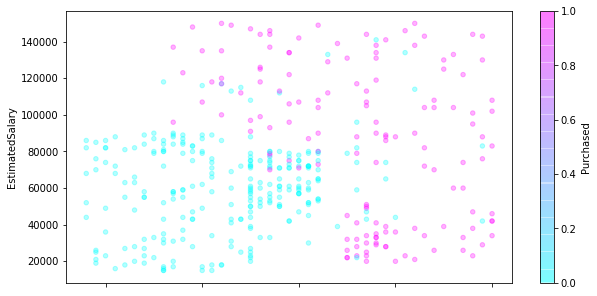

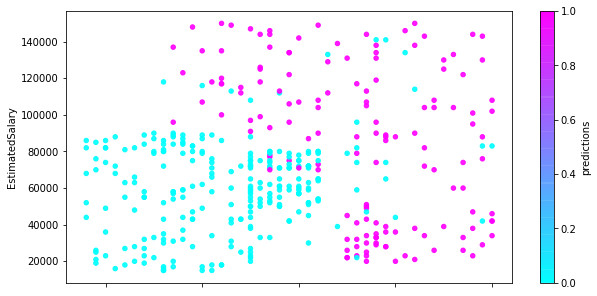

In [16]:
df.plot.scatter(x='Age',y='EstimatedSalary',c='Purchased',figsize=(10,5),alpha=.3,cmap='cool')
df.plot.scatter(x='Age',y='EstimatedSalary',c='predictions',figsize=(10,5),alpha=.9,cmap='cool')